In [15]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d

cleanInsurance = pd.read_csv("sets/insurance_clean.csv")
plotPalette = "Blues"

def save_plot(plot, fileName):
    figure = plot.get_figure()
    figure.set_size_inches(8, 8)
    figure.savefig("../results/" + fileName + ".png")

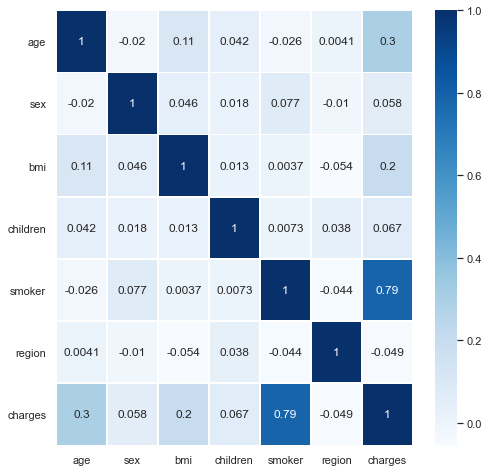

In [16]:
correlation = cleanInsurance.corr()
heatmap = sb.heatmap(correlation, annot = True, cmap = plotPalette, linewidths = 0.5)
save_plot(heatmap, "correlation")
plt.show()

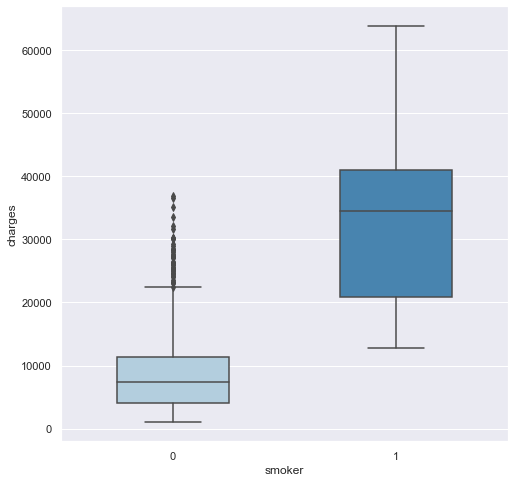

In [17]:
boxplot = sb.boxplot(x = "smoker", y = "charges", data = cleanInsurance, palette = plotPalette, width = 0.5, linewidth = 1.5)
save_plot(boxplot, "smoker_charges_plot")
plt.show()

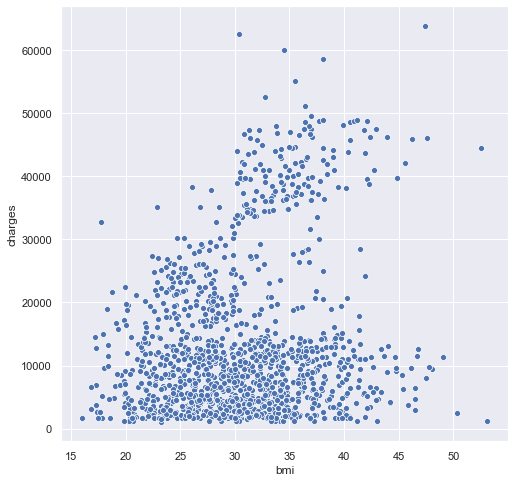

In [18]:
scatterplot = sb.scatterplot(x = "bmi", y = "charges", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "bmi_charges_plot")
plt.show()

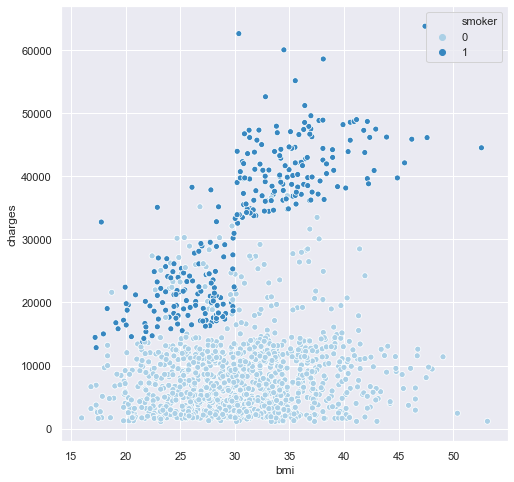

In [19]:
scatterplot = sb.scatterplot(x = "bmi", y = "charges", hue = "smoker", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "bmi_charges_smoker_plot")
plt.show()

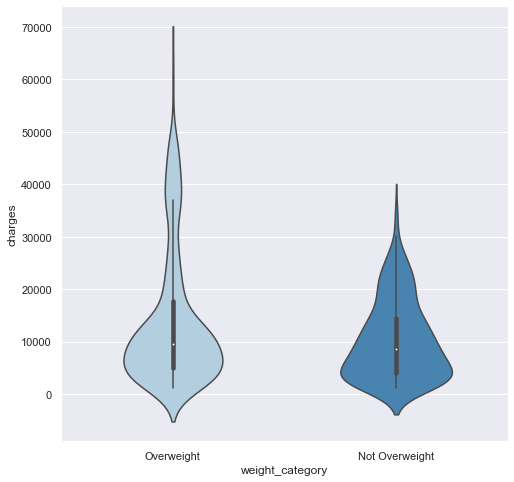

In [20]:
weightInsurance = cleanInsurance.copy()
weightInsurance["weight_category"] = np.where(cleanInsurance["bmi"] > 25, "Overweight", "Not Overweight")

violinplot = sb.violinplot(x = "weight_category", y = "charges", data = weightInsurance, palette = plotPalette, width = 0.5, linewidth = 1.5)
save_plot(violinplot, "weight_charges_plot")
plt.show()

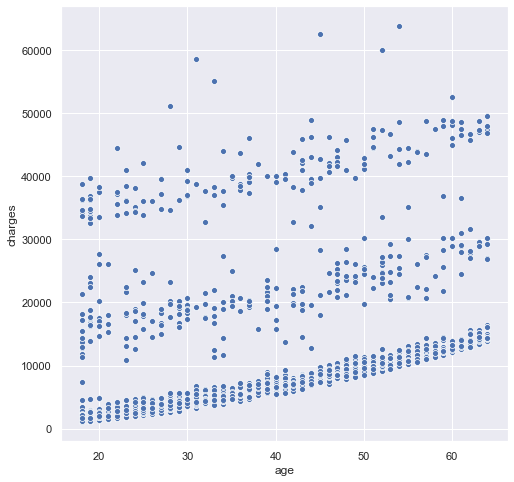

In [21]:
scatterplot = sb.scatterplot(x = "age", y = "charges", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "age_charges_plot")
plt.show()

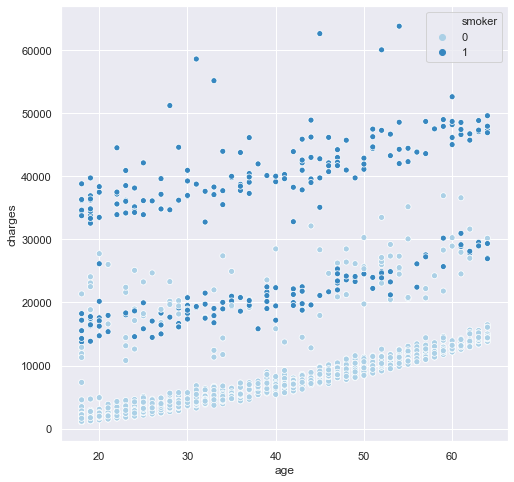

In [22]:
scatterplot = sb.scatterplot(x = "age", y = "charges", hue = "smoker", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "age_charges_smoker_plot")
plt.show()

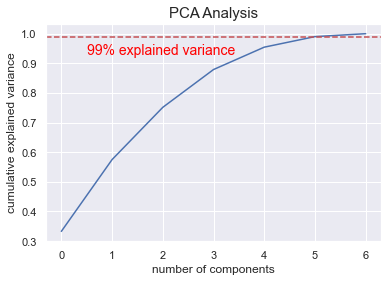

In [23]:
#plot of cumulative explained variance vs. # of PCs
sb.set()
scaler = MinMaxScaler()
cleanInsurance = cleanInsurance.astype(np.float)
data_rescaled = scaler.fit_transform(cleanInsurance)

pca = PCA()
pca.fit_transform(data_rescaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA Analysis', fontsize=15)

plt.axhline(y=0.99, color='r', linestyle='--')
plt.text(0.5, .93, '99% explained variance', color = 'red', fontsize=14)

plt.show()


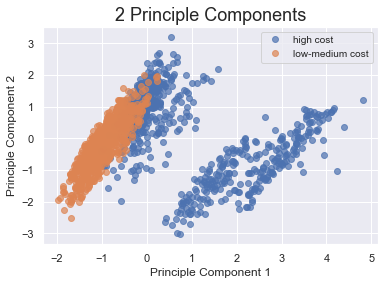

In [24]:
#assign labels "high cost" and "low-median cost" based on median of charges
charges_median = cleanInsurance['charges'].median()
labels = []

for index, row in cleanInsurance.iterrows():
    if row['charges'] > charges_median:
        labels.append("high cost")
    else:
        labels.append("low-medium cost")
        
#plot of datapoints in 2D space using first 2 PCs
standard_scaler = StandardScaler()
data_rescaled = standard_scaler.fit_transform(cleanInsurance)
pca2 = PCA(n_components=2)
components = pca2.fit_transform(data_rescaled)

principalDf=pd.DataFrame(data=components,columns=['PC1','PC2']) 
principalDf['label'] = labels

for key, group in principalDf.groupby(['label']):
    plt.plot(group.PC1, group.PC2, 'o', alpha=0.7, label=key)
plt.legend(fontsize=10)
plt.margins(0.05)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('2 Principle Components',fontsize=18) 
plt.show()


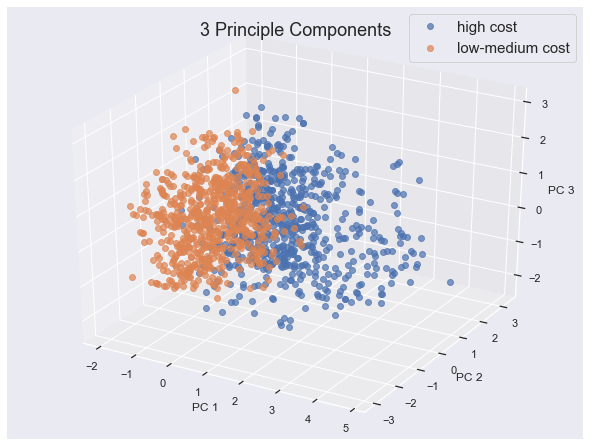

In [25]:
#plot of datapoints in 3D space using first 3 PCs
pca3 = PCA(n_components=3)
components = pca3.fit_transform(data_rescaled)

principalDf=pd.DataFrame(data=components,columns=['PC1','PC2','PC3']) 
principalDf['label'] = labels

fig = plt.figure(1, figsize=(8, 6))
ax = mpl_toolkits.mplot3d.Axes3D(fig)
for key, group in principalDf.groupby(['label']):
    ax.plot(group.PC1, group.PC2, group.PC3, 'o', alpha=0.7, label=key)

ax.set_title("3 Principle Components",fontsize=18)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(fontsize=15)
plt.show()